<br>
<br>

## 1. 텍스트 데이터 분석을 위한 라이브러리 설치 및 세팅

<br>

### 1-1) NLTK 설치

- Text Processing을 위한 라이브러리인 **nltk** library(Natural Language Toolkit)를 설치 및 세팅합니다.

In [120]:
# !pip install nltk==3.4

In [121]:
import nltk

아래 명령어를 통해 download 대화상자를 열어 패키지를 다운로드 받아야 합니다.
<br>인터넷 속도 저하 시 매우 오래 걸리므로, 패키지 설치 경로만 확인한 다음 \[ (nltk, downloaded) nltk_data.zip ] 의 파일들을 복사합니다.
<br><br>경로 예시 : **"C:\Users\{컴퓨터 이름}\AppData\Roaming\nltk_data"**
<br>
**<p style='color:red;'>nltk_data 폴더 안에 corpora, taggers, tokenizers 폴더가 바로 위치하도록 복사해줘야 합니다.</p>**

In [122]:
# nltk.download()  # 텍스트 데이터 처리를 위한 패키지 다운로더

# Download following packages
# Corpora : stopwords, wordnet
# Models : averaged_perceptron_tagger, maxnet_treebank_pos_tagger, punkt

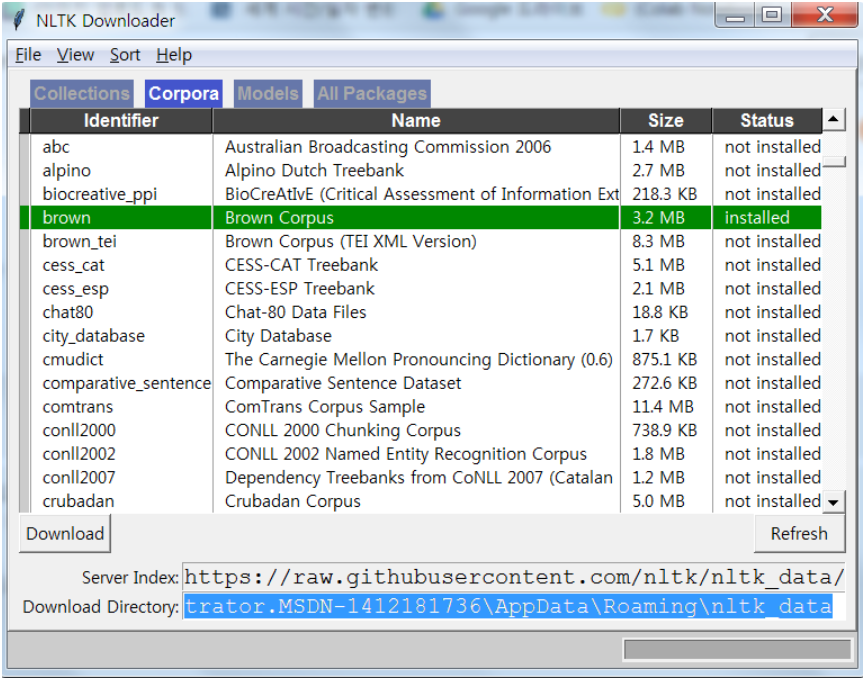

<br>

### 1-2) NLTK 테스트

In [123]:
# 전처리하고자 하는 문장을 String 변수로 저장한다
sentence = 'NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.'

# 각 문장을 토큰화한 결과를 출력한다
nltk.word_tokenize(sentence)[:8]  # 문장을 '단어 수준에서' 토큰화해 출력한다 

['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python']

<br>

### 1-3) Konlpy 설치

#### 1) Microsoft Build Tools 2015 를 설치합니다.

- 첨부해드린 **BuildTools_Full.exe** 파일을 실행하여 Microsoft Build Tools 2015 를 설치해줍니다.
<br><br>

#### 2) Java SE Development Kit (JDK) 를 설치합니다.

- 첨부해드린 **jdk-8u221-windows-x64.exe** 파일을 실행하여 JDK 를 설치해줍니다. (설정을 모두 그대로 유지한 채 설치해주셔야 합니다.)
- Mac OS 사용자는 http://j.mp/2lBBj1h 에서 OS 버전에 맞는 설치 파일을 다운로드하여 설치합니다.
<br><br>

#### 3) 설치가 완료되면 아래 2개의 셀을 차례대로 실행하여 JPype1과 konlpy를 설치해줍니다.

In [124]:
# !pip install JPype1-0.6.3-cp37-cp37m-win_amd64.whl
# Mac OS 사용자는 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 에서 OS 버전에 맞는 .whl 파일을 다운로드합니다. 
# * JPype1 0.6.3 버전으로 선택합니다.
# * cp37 == Python 3.7.x 버전

In [125]:
# !pip install konlpy==0.5.1

<br>

### 1-4) Konlpy 테스트

In [126]:
# Twitter 라이브러리가 정상적으로 작동하는지 확인합니다.
from konlpy.tag import Twitter

twitter = Twitter()
malist = twitter.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


<br>
<br>

## 2. 크롤링 데이터 전처리

In [127]:
import numpy as np
import pandas as pd

<br>

### 2-1) 크롤링 데이터 불러오기

In [128]:
df = pd.read_excel('result_190729_0552.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"""6살 한국 유튜버 90억원 건물 매입"" CNN '보람튜브' 소개",2019.07.27. 오후 5:18,【서울=뉴시스】CNN이 27일 한국의 인기 아동 유튜브 콘텐츠 '보람채널'의 흥행을...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
1,"CNN도 주목한 '보람튜브'…""아동 유튜버, 과거에도 논란""",2019.07.27. 오후 4:03,보람튜브 갈무리 © 뉴스1(서울=뉴스1) 이원준 기자 = 유명 유튜브 채널 '보람튜...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1
2,"CNN, '보람튜브' 주목… ""아동유튜버 논란 우려""",2019.07.27. 오후 5:39,/사진=보람튜브 유튜브채널 캡처유명 유튜브채널 ‘보람튜브’에 대해 외신들도 주목하기...,https://news.naver.com/main/read.nhn?mode=LSD&...,머니S
3,'보람튜브 빌딩 매입'보다 주목해야 할 사실,2019.07.27. 오후 4:54,"키즈콘텐츠 성공, 영유아 시청시간에 비례…스마트폰 ‘과의존’ 아이들 늘었다 영유아기...",https://news.naver.com/main/read.nhn?mode=LSD&...,미디어오늘
4,[오태훈의 시사본부] 강남 빌딩 매입한 ‘보람튜브’ 고수익의 비밀,2019.07.26. 오후 3:42,- 보람튜브 위상 어마어마해…해외 크리에이터와 견줘도 뒤쳐지지 않는 글로벌 콘텐츠 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,KBS


In [129]:
articles = df['Article'].tolist()
len(articles)

57

In [130]:
s = 'python is easy'
result = s.split()
print(result)

new_result = '___'.join(result)
print(new_result)

['python', 'is', 'easy']
python___is___easy


In [131]:
articles = ' '.join(articles) # 리스트의 아이템들을 특정한 문자를 기준으로 이어 붙이기
articles[:1000]

"【서울=뉴시스】CNN이 27일 한국의 인기 아동 유튜브 콘텐츠 '보람채널'의 흥행을 소개하는 기사를 실었다. 사진은 CNN 인터넷판 보도내용을 갈무리한 것이다. 2019.07.27【서울=뉴시스】우은식 기자 = CNN이 한국의 아동용 인기 유튜브 콘텐츠 '보람튜브'의 흥행과 최근 부동산 매입 소식을 소개하는 기사를 실었다.CNN은 26일(현지시간) 3000만명의 구독자수를 가진 한국의 6살 유튜브 스타가 최근 95억원에 달하는 서울의 5층짜리 부동산 건물을 사들였다고 보도했다. 보람채널에 출연하는 이보람(6)양은 1360만명의 구독자가 있는 '보람튜브 토이리뷰'와 1760만명의 구독자가 있는 '보람튜브 브이로그' 2개 채널의 주인공이다. 보람양 부모가 설립한 ㈜보람패밀리는 지난 4월 서울 강남구 청담동에 있는 D빌딩을 95억원에 사들인 것으로 알려졌다.  부동산 업계와 인터넷등기소에 따르면 보람패밀리는 대지면적 258.3㎡에 지하 1층, 지상 5층 규모의 빌딩을 단독으로 매입했다. CNN은 보람튜브가 지난 2017년 일부 콘텐츠가 아동들의 정서와 윤리에 악영향을 미친다며 소송을 당한 사실을 소개하기도 했다. 유튜브 분석사이트인 소셜블레이드에 따르면 보람패밀리는 '보람튜브 토이리뷰'와 '보람튜브 브이로그' 등 2개 채널을 통해 각각 월 160만달러(19억원)와 150만달러(17억8000만원) 등 총 37억원 이상의 광고매출을 내는 등 국내 유튜브 콘텐츠 중 가장 많은 광고수익을 올리는 것으로 알려졌다.  포브스에 따르면 지난해 가장 많은 수입을 올린 유튜버는 라이언 토이즈리뷰의 진행자 라이언 카지(7)로 그 역시 7살 소년이었다. 라이언은 지난해 2080만명의 구독자수를 기록하며 2200만달러(260억6000만원)를 벌어들였다. 미 가족 유튜브 채널 '트라브&코'에 출연하는 아동 유튜브 스타 타이더스(5)는 310만명의 구독자수를 기록하고 있다. 유튜버는 비디오 콘텐츠에 삽입되는 광고 수익과 함께 제품 노출, 브랜드 제휴 등 다양한 방법으로 돈을 벌 수 있다. 

<br>

### 2-2) 단어 정규화 및 어근화, 품사 태깅

In [132]:
# input data 에 품사를 태깅(tagging)합니다.
# 이 때, stem 및 norm 옵션의 기능은 다음과 같습니다.

# norm == 정규화(normalization)
# 한국어를 처리하는 예시입니닼ㅋㅋㅋ -> 한국어를 처리하는 예시입니다ㅋㅋ

# stem == 어근화(stemming)
# 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle

from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged

[('【', 'Foreign'),
 ('서울', 'Noun'),
 ('=', 'Punctuation'),
 ('뉴시스', 'Noun'),
 ('】', 'Foreign'),
 ('CNN', 'Alpha'),
 ('이', 'Noun'),
 ('27일', 'Number'),
 ('한국', 'Noun'),
 ('의', 'Josa'),
 ('인기', 'Noun'),
 ('아동', 'Noun'),
 ('유튜브', 'Noun'),
 ('콘텐츠', 'Noun'),
 ("'", 'Punctuation'),
 ('보람', 'Noun'),
 ('채널', 'Noun'),
 ("'", 'Punctuation'),
 ('의', 'Noun'),
 ('흥행', 'Noun'),
 ('을', 'Josa'),
 ('소개', 'Noun'),
 ('하다', 'Verb'),
 ('기사', 'Noun'),
 ('를', 'Josa'),
 ('실었다', 'Noun'),
 ('.', 'Punctuation'),
 ('사진', 'Noun'),
 ('은', 'Josa'),
 ('CNN', 'Alpha'),
 ('인터넷', 'Noun'),
 ('판', 'Noun'),
 ('보도', 'Noun'),
 ('내용', 'Noun'),
 ('을', 'Josa'),
 ('갈무리', 'Noun'),
 ('한', 'Josa'),
 ('것', 'Noun'),
 ('이다', 'Josa'),
 ('.', 'Punctuation'),
 ('2019.07', 'Number'),
 ('.', 'Punctuation'),
 ('27', 'Number'),
 ('【', 'Foreign'),
 ('서울', 'Noun'),
 ('=', 'Punctuation'),
 ('뉴시스', 'Noun'),
 ('】', 'Foreign'),
 ('우', 'Adverb'),
 ('은', 'Noun'),
 ('식', 'Suffix'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('CNN', 'Alpha'),
 ('이', 'No

<br>

### 2-3) 단어 등장 빈도 카운팅

In [133]:
# 정규화 및 어근화를 마치고 품사 태깅까지 마친 상태에서,
# 조사, 어미, 구두점을 제외한 나머지 단어들을 모두 word_cleaned 리스트에 담습니다.
# 이 때에는 여러번 나온 단어들도 복수 허용되어 여러번 리스트에 담기게 됩니다.

# 유의미한 의미를 갖고 있지 않은 단어를 제외할 수 있습니다.
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # word[1]과 뒤에 array element들이 일치하지 않을 때
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['서울',
 '뉴시스',
 'CNN',
 '27일',
 '한국',
 '인기',
 '아동',
 '유튜브',
 '콘텐츠',
 '보람',
 '채널',
 '흥행',
 '소개',
 '기사',
 '실었다',
 '사진',
 'CNN',
 '인터넷',
 '보도',
 '내용',
 '갈무리',
 '2019.07',
 '27',
 '서울',
 '뉴시스',
 '기자',
 'CNN',
 '한국',
 '아동',
 '인기',
 '유튜브',
 '콘텐츠',
 '보람',
 '튜브',
 '흥행',
 '최근',
 '부동산',
 '매입',
 '소식',
 '소개',
 '기사',
 '실었다',
 'CNN',
 '26일',
 '현지',
 '시간',
 '3000만',
 '구독',
 '자수',
 '가지다',
 '한국',
 '유튜브',
 '스타',
 '최근',
 '95억원',
 '서울',
 '짜다',
 '부동산',
 '건물',
 '사들이다',
 '보도',
 '보람',
 '채널',
 '출연',
 '이보람',
 '양은',
 '1360만',
 '독자',
 '보람',
 '튜브',
 '토이',
 '리뷰',
 '오다',
 '1760만',
 '독자',
 '보람',
 '튜브',
 '브이',
 '로그',
 '채널',
 '주인공',
 '보람',
 '부모',
 '설립',
 '보람',
 '패밀리',
 '지난',
 '4월',
 '서울',
 '강남구',
 '청담동',
 '빌딩',
 '95억원',
 '사들이다',
 '알려지다',
 '부동산',
 '업계',
 '인터넷',
 '등기',
 '따르다',
 '보람',
 '패밀리',
 '대지면적',
 '258.3',
 '지하',
 '지상',
 '규모',
 '빌딩',
 '단독',
 '매입',
 'CNN',
 '보람',
 '튜브',
 '지난',
 '2017년',
 '일부',
 '콘텐츠',
 '아동',
 '정서',
 '윤리',
 '영향',
 '미치다',
 '소송',
 '당한',
 '사실',
 '소개',
 '유튜브',
 '분석',
 '사이트',
 '소셜',
 '블레이드',
 '따르다',
 '보람',


In [134]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'서울': 46,
 '뉴시스': 5,
 'CNN': 16,
 '27일': 1,
 '한국': 71,
 '인기': 55,
 '아동': 75,
 '유튜브': 316,
 '콘텐츠': 100,
 '보람': 517,
 '채널': 276,
 '흥행': 2,
 '소개': 22,
 '기사': 14,
 '실었다': 2,
 '사진': 36,
 '인터넷': 16,
 '보도': 12,
 '내용': 18,
 '갈무리': 4,
 '2019.07': 1,
 '27': 1,
 '기자': 58,
 '튜브': 356,
 '최근': 57,
 '부동산': 17,
 '매입': 74,
 '소식': 19,
 '26일': 9,
 '현지': 4,
 '시간': 34,
 '3000만': 12,
 '구독': 59,
 '자수': 12,
 '가지다': 10,
 '스타': 14,
 '95억원': 46,
 '짜다': 21,
 '건물': 40,
 '사들이다': 33,
 '출연': 13,
 '이보람': 35,
 '양은': 11,
 '1360만': 3,
 '독자': 118,
 '토이': 66,
 '리뷰': 77,
 '오다': 42,
 '1760만': 1,
 '브이': 68,
 '로그': 70,
 '주인공': 21,
 '부모': 74,
 '설립': 1,
 '패밀리': 69,
 '지난': 42,
 '4월': 15,
 '강남구': 27,
 '청담동': 45,
 '빌딩': 146,
 '알려지다': 62,
 '업계': 15,
 '등기': 4,
 '따르다': 72,
 '대지면적': 6,
 '258.3': 9,
 '지하': 2,
 '지상': 2,
 '규모': 8,
 '단독': 9,
 '2017년': 35,
 '일부': 18,
 '정서': 10,
 '윤리': 4,
 '영향': 7,
 '미치다': 6,
 '소송': 1,
 '당한': 2,
 '사실': 66,
 '분석': 48,
 '사이트': 34,
 '소셜': 26,
 '블레이드': 23,
 '통해': 21,
 '각각': 6,
 '160만달러': 2,
 '19억원': 6,
 '150만달러

In [135]:
# # 위 cell에서의 작업과 동일한 작업을 아래의 코드로 대체할 수 있습니다.

# from collections import Counter
# result = Counter(word_cleaned)
# word_dic = dict(result)
# word_dict

#### -> You can preceed to [3. 워드클라우드 만들기] from here.

In [136]:
word_dic.items()

dict_items([('서울', 46), ('뉴시스', 5), ('CNN', 16), ('27일', 1), ('한국', 71), ('인기', 55), ('아동', 75), ('유튜브', 316), ('콘텐츠', 100), ('보람', 517), ('채널', 276), ('흥행', 2), ('소개', 22), ('기사', 14), ('실었다', 2), ('사진', 36), ('인터넷', 16), ('보도', 12), ('내용', 18), ('갈무리', 4), ('2019.07', 1), ('27', 1), ('기자', 58), ('튜브', 356), ('최근', 57), ('부동산', 17), ('매입', 74), ('소식', 19), ('26일', 9), ('현지', 4), ('시간', 34), ('3000만', 12), ('구독', 59), ('자수', 12), ('가지다', 10), ('스타', 14), ('95억원', 46), ('짜다', 21), ('건물', 40), ('사들이다', 33), ('출연', 13), ('이보람', 35), ('양은', 11), ('1360만', 3), ('독자', 118), ('토이', 66), ('리뷰', 77), ('오다', 42), ('1760만', 1), ('브이', 68), ('로그', 70), ('주인공', 21), ('부모', 74), ('설립', 1), ('패밀리', 69), ('지난', 42), ('4월', 15), ('강남구', 27), ('청담동', 45), ('빌딩', 146), ('알려지다', 62), ('업계', 15), ('등기', 4), ('따르다', 72), ('대지면적', 6), ('258.3', 9), ('지하', 2), ('지상', 2), ('규모', 8), ('단독', 9), ('2017년', 35), ('일부', 18), ('정서', 10), ('윤리', 4), ('영향', 7), ('미치다', 6), ('소송', 1), ('당한', 2), ('사실', 66), ('분석', 48),

In [137]:
# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬합니다.

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('보람', 517),
 ('튜브', 356),
 ('유튜브', 316),
 ('채널', 276),
 ('영상', 188),
 ('수익', 187),
 ('광고', 155),
 ('빌딩', 146),
 ('유튜버', 144),
 ('보다', 131),
 ('아이', 123),
 ('독자', 118),
 ('받다', 102),
 ('콘텐츠', 100),
 ('뉴스', 93),
 ('많다', 85),
 ('늘다', 81),
 ('가족', 79),
 ('리뷰', 77),
 ('올리다', 76),
 ('아동', 75),
 ('매입', 74),
 ('부모', 74),
 ('따르다', 72),
 ('한국', 71),
 ('로그', 70),
 ('패밀리', 69),
 ('브이', 68),
 ('토이', 66),
 ('사실', 66),
 ('동영상', 66),
 ('회사', 66),
 ('알려지다', 62),
 ('아동학대', 62),
 ('가다', 62),
 ('무단', 61),
 ('나오다', 61),
 ('키즈', 61),
 ('강남', 61),
 ('같다', 60),
 ('구독', 59),
 ('장난감', 59),
 ('기자', 58),
 ('논란', 58),
 ('최근', 57),
 ('금지', 57),
 ('인기', 55),
 ('배포', 55),
 ('넘다', 51),
 ('우리', 51),
 ('어린이', 50),
 ('정도', 50),
 ('없다', 50),
 ('수입', 49),
 ('대한', 49),
 ('강민', 49),
 ('분석', 48),
 ('국내', 47),
 ('때문', 47),
 ('경우', 47),
 ('서울', 46),
 ('95억원', 46),
 ('문제', 46),
 ('최영일', 46),
 ('생각', 46),
 ('청담동', 45),
 ('이상', 43),
 ('네이버', 43),
 ('일본', 43),
 ('오다', 42),
 ('지난', 42),
 ('추정', 42),
 ('건물', 40),
 ('운영', 39),
 ('많이

In [138]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같습니다.

# ('보람', 517),
for word, count in sorted_word_dic[:50]:
    print("{0}({1})".format(word, count), end=" ")

보람(517) 튜브(356) 유튜브(316) 채널(276) 영상(188) 수익(187) 광고(155) 빌딩(146) 유튜버(144) 보다(131) 아이(123) 독자(118) 받다(102) 콘텐츠(100) 뉴스(93) 많다(85) 늘다(81) 가족(79) 리뷰(77) 올리다(76) 아동(75) 매입(74) 부모(74) 따르다(72) 한국(71) 로그(70) 패밀리(69) 브이(68) 토이(66) 사실(66) 동영상(66) 회사(66) 알려지다(62) 아동학대(62) 가다(62) 무단(61) 나오다(61) 키즈(61) 강남(61) 같다(60) 구독(59) 장난감(59) 기자(58) 논란(58) 최근(57) 금지(57) 인기(55) 배포(55) 넘다(51) 우리(51) 

<br>

### 2-4) 단어 등장 빈도 시각화

In [139]:
# matplot 에서 한글을 표시하기 위한 설정입니다.
# 맑은고딕 대신 나눔고딕 폰트를 사용하려면 [나눔고딕파일] 폴더의 파일들을 복사하여, C drive -> Windows -> Fonts 폴더 안에 붙여넣기합니다.

import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 위치를 넣어주세요 (위에서 나눔고딕 파일을 해당 경로에 복사붙여넣기 했을 경우 그대로 실행하셔도 무방합니다.)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

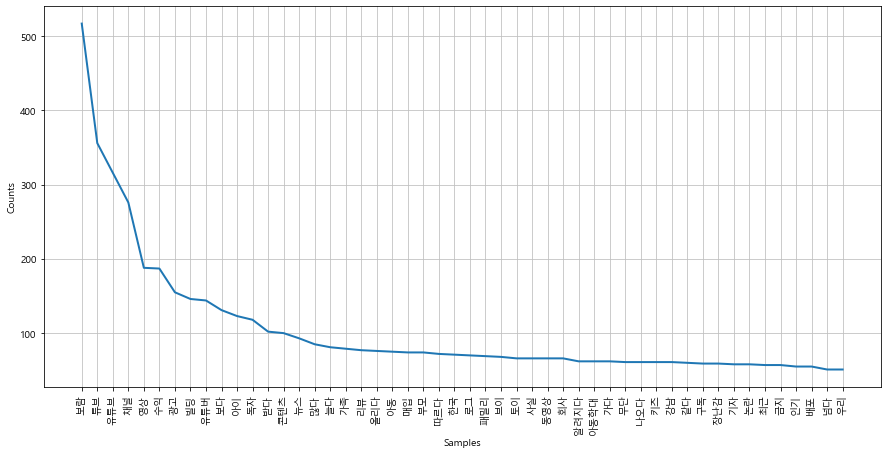

In [140]:
# nltk 라이브러리는 단어의 등장 빈도를 더욱 쉽게 셀 수 있는 .Text() 함수를 제공합니다.

word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

<br>

### 2-5) 단어 등장 빈도 시각화 (막대그래프)

In [141]:
# 막대그래프로의 시각화는 NLTK 의 함수만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화를 진행합니다.

word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution
word_frequency

FreqDist({'보람': 517, '튜브': 356, '유튜브': 316, '채널': 276, '영상': 188, '수익': 187, '광고': 155, '빌딩': 146, '유튜버': 144, '보다': 131, ...})

In [142]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:50]
# result

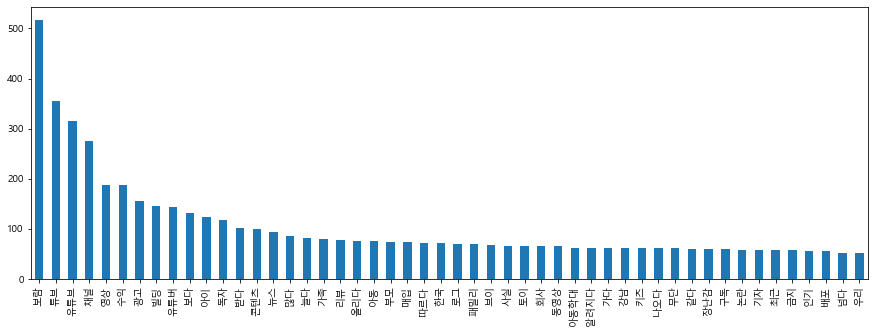

In [143]:
# 데이터프레임에 담긴 단어 및 빈도 수를 막대그래프로 표현하기 위한 코드입니다.

result.plot(kind='bar', legend=False, figsize=(15,5)) # 'bar' graph
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.
# 기타 그래프 관련 옵션은 https://goo.gl/YNejGt 에서 확인하고 적용하실 수 있습니다.

plt.show()

<br>
<br>

## 3. 워드클라우드 만들기 

- 워드클라우드를 만들기에 앞서 WordCloud library 를 설치해주어야 합니다.

- [ 시작메뉴 -  모든 프로그램 - Anaconda 3 - **Anaconda Prompt** ] 에서 아래 명령어를 입력합니다. (우클릭 후 **"관리자권한으로 실행"**)
<br>**conda install -c https://conda.anaconda.org/conda-forge wordcloud==1.5.0**

In [144]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

#### 3-1) WordCloud - 하얀 바탕

In [145]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있습니다.
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [146]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

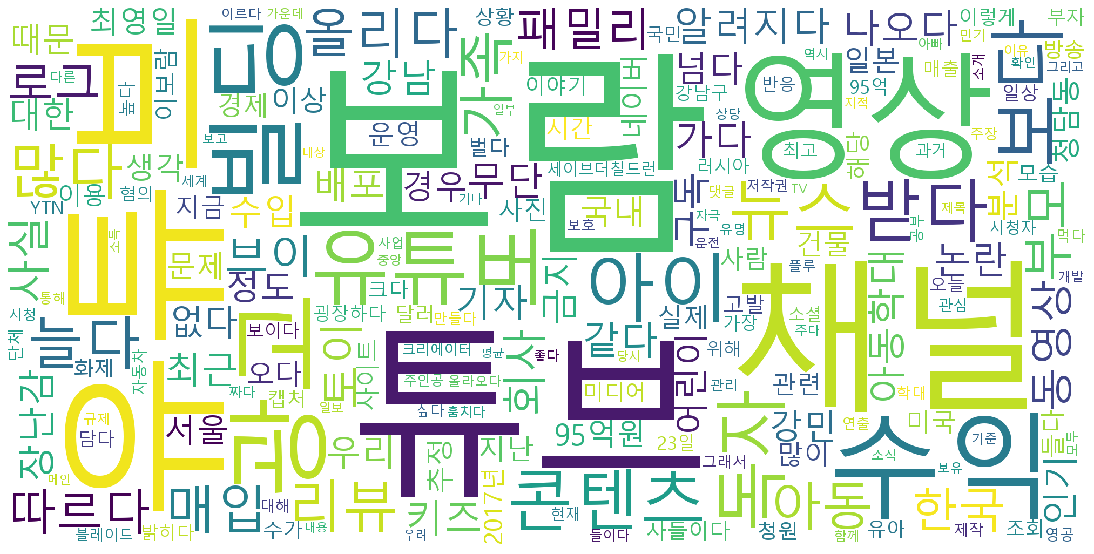

In [147]:
# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-2) WordCloud - 하얀 바탕, 최대 단어 갯수 50

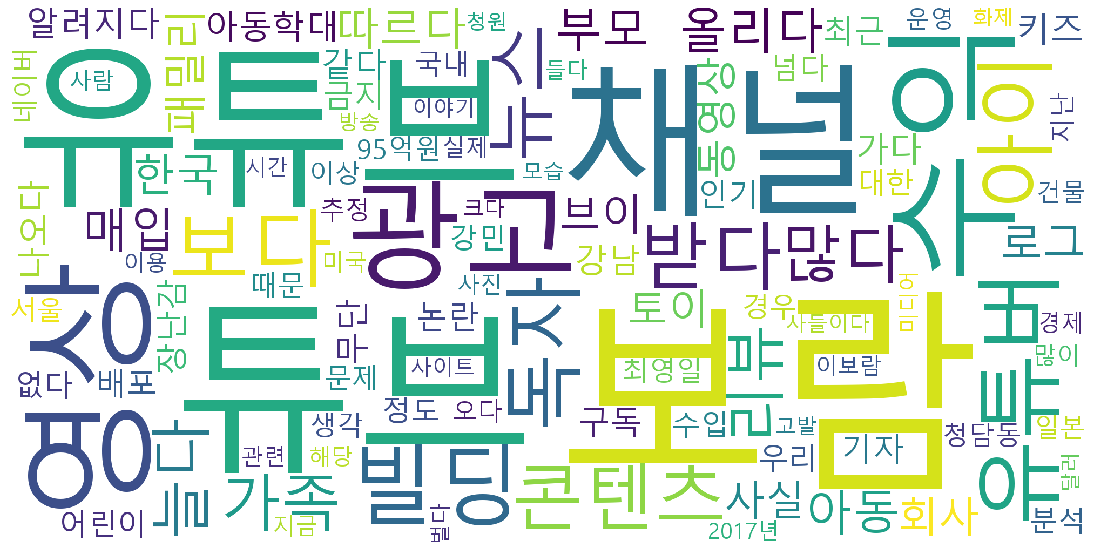

In [148]:
# max_words 라는 옵션을 통해 워드클라우드에 담길 단어의 최대 갯수를 제한할 수 있습니다.
# 기본적으로 옵션을 지정하지 않으면 200 으로 default 값이 지정되어 있습니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=100, # max words
                       width=2000, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)


# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-3) WordCloud - 검정 바탕, 최대 폰트 사이즈 100

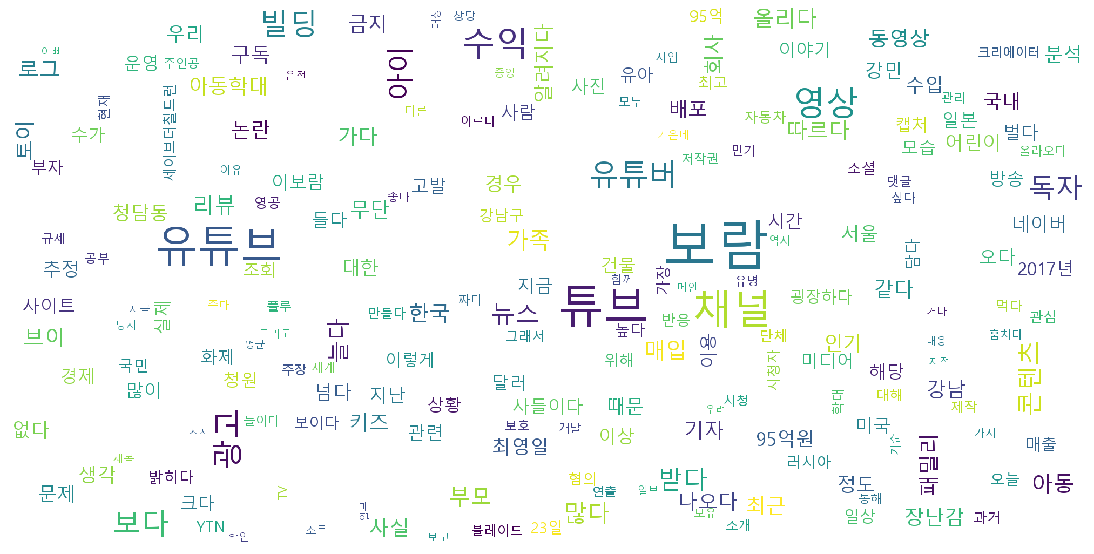

In [113]:
# max_font_size 라는 옵션을 통해 최대 글자 크기를 제한할 수 있습니다.

# 아래 옵션 중 어느 것을 지워줘야 바탕이 검정(default)이 될까요?
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       background_color='white', 
                       max_font_size=100).generate_from_frequencies(word_dic) # Max font-size

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-4) WordCloud - masking 적용 (특정 그림 테두리 내에 워드클라우드 그리기)

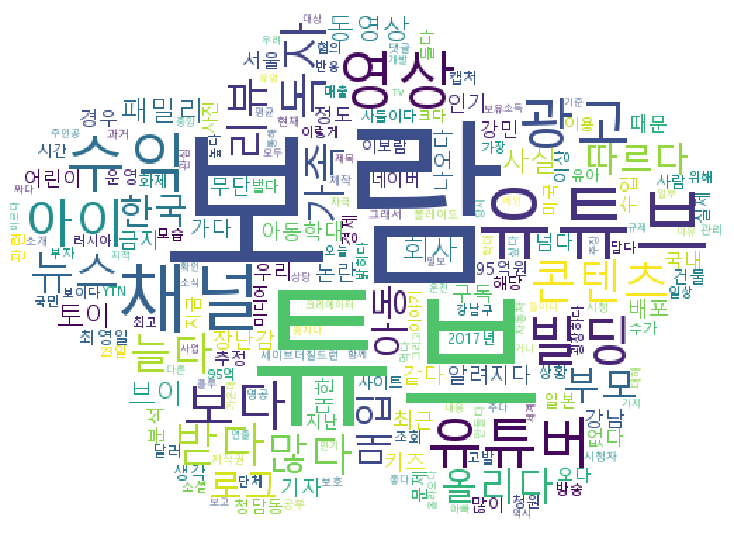

In [114]:
youtube_coloring = np.array(Image.open("youtube_mask.jpg"))
cloud_mask = np.array(Image.open("mask-cloud.png"))

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       mask=twitter_mask, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-5) WordCloud - masking 적용 (특정 그림 테두리 내에 워드클라우드 그리기 & 그림 색상으로 전체 색상 통일)

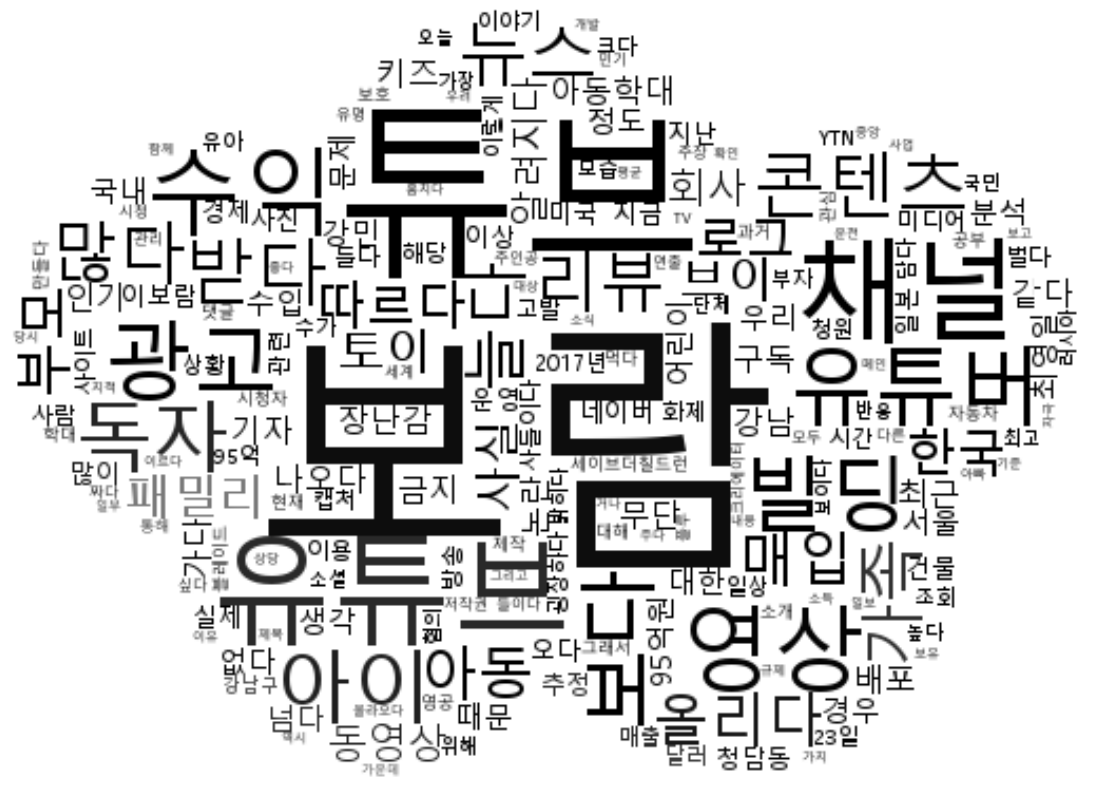

In [115]:
image_colors = ImageColorGenerator(cloud_mask)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=cloud_mask, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.?(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>
<br>

#### 3-6) 워드클라우드를 이미지 파일로 저장하기 

In [116]:
# 아래 코드를 실행하시면 jupyter notebook 과 동일한 폴더에 워드클라우드가 이미지 파일로 저장된 것을 확인하실 수 있습니다.

word_cloud.to_file("word_cloud_completed.png") # Save "to file"

<br>

#### 3-7) WordCloud 요약 (완성본)

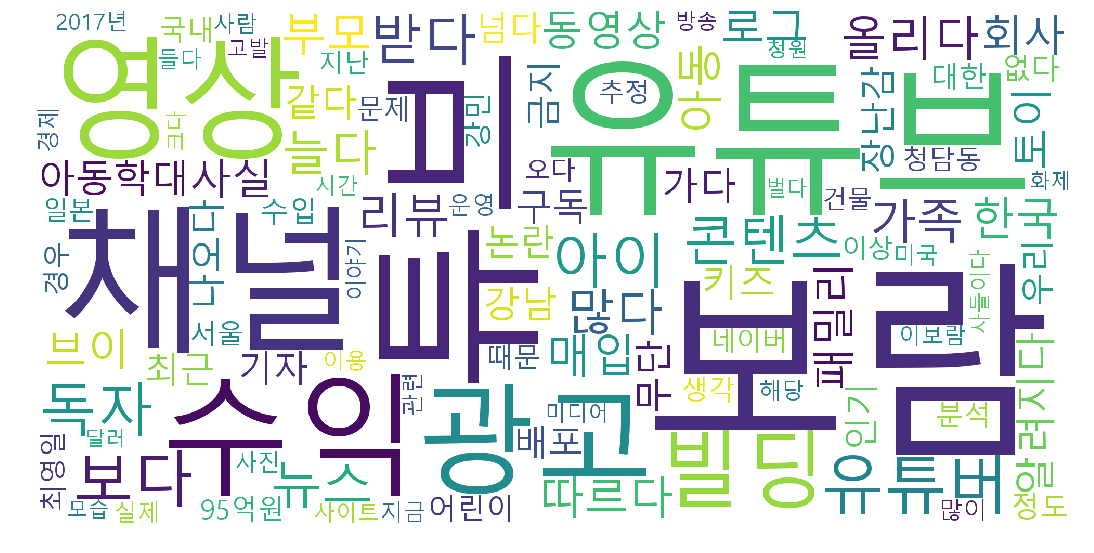

In [80]:
# 아래 옵션들을 원하시는대로 지정하셔서 가장 마음에 드는 워드클라우드를 활용하시면 됩니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # 한글 폰트 변경
                       width=2000, height=1000, # 실제 워드클라우드 크기 변경 (해상도 변경)
                       max_words=100, # 최대로 보여질 단어 수 제한
                       background_color='white', # 바탕색 지정 (주석처리할 경우 검정으로 변경됨)
#                        max_font_size=100, # 최대 단어 크기 제한
                      ).generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15)) # Jupyter notebook 상에서 보여지는 워드클라우드 크기 지정 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("word_cloud_7 (white, squared, max100).png")

<br>

#### Appendix) Try other masks!

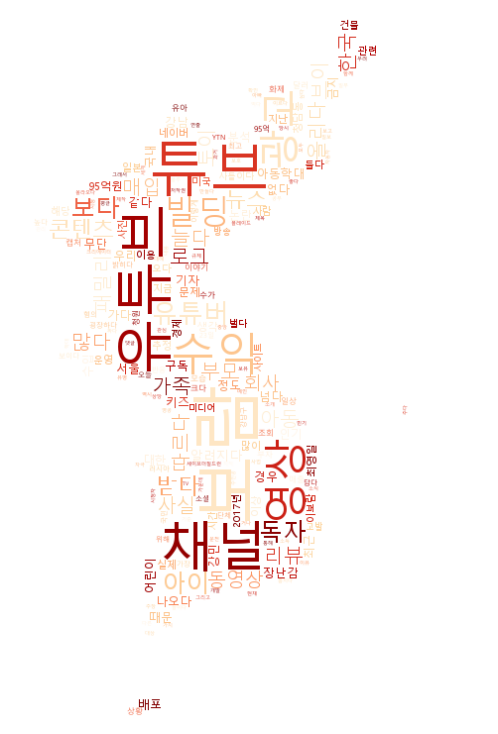

In [155]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

korea_coloring = np.array(Image.open("other masks/korea_mask.jpg"))
# image_colors = ImageColorGenerator(korea_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       width=1600, height=1000, 
                       mask=korea_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud.recolor(colormap='OrRd'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
# plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("other_masks_applied.png")